# Business Case
Invasive ductal carcinoma (IDC), also known as infiltrating ductal carcinoma, is cancer that began growing in a milk duct and has invaded the fibrous or fatty tissue of the breast outside of the duct. IDC is the most common form of breast cancer, representing 80 percent of all breast cancer diagnoses.

Although invasive ductal carcinoma can affect women at any age, it is more common as women grow older. According to the American Cancer Society, about two-thirds of women are 55 or older when they are diagnosed with an invasive breast cancer. Invasive ductal carcinoma also affects men.

IDC is usually found as the result of an unusual mammogram. To diagnose cancer, you’ll get a biopsy to collect cells for analysis. The doctor will remove a bit of tissue to look at under a microscope. They can make a diagnosis from the biopsy results

If the biopsy confirms you have cancer, you’ll likely have more tests to see how large the tumor is and if it has spread

The amount of time it will take for you to receive the results of the biopsy depends on how many tests are needed on the sample to make a diagnosis. Based on this analysis, a pathologist determines whether the tissue removed contains a tumor and what type it is.

A result can often be given within 2 to 3 days after the biopsy. A result that requires a more complicated analysis can take 7 to 10 days. Ask your doctor how you will receive the biopsy results and who will explain them to you.

The process is time consuming and always a chance for a human error. As a part of the biopsy test, a small part of the tissue is put on a glass slide under a microscope for the pathologist to examine. Then the pathologist scans through the region to find malignant areass. 



# ML Problem Statement
With the current day technology. The glass slides under a microscope can be made digital. The original dataset consisted of 162 whole mount slide images of Breast Cancer specimens scanned. The main goal of the model is accuratly identifying in order to help clinical tast and save time and reduce error 

# Invasive Ductal Carcinoma Model

## Dataset
We will use the 'Breast Histopathology Images' dataset. This dataset consists of 277,524 image patches of size 50x50 (198,738 IDC negative and 78,786 IDC positive). The images are in png format.

### Required Libraries and Files

In [1]:
import tensorflow
from numpy.random import seed
seed(106)
tensorflow.random.set_seed(106)

import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform
import seaborn as sns
sns.set()
from os import listdir
from skimage.io import imread


from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

### About Files

The images are grouped into 279 folders by patient_id. Each patient folder has two sub-folders that groups together images with the same class --> 0 or 1.

In [2]:
#Reading the dataset
os.listdir('IDC_regular_ps50_idx5')

['9036',
 '10268',
 '10257',
 '8913',
 '13613',
 '8914',
 '15510',
 '10259',
 '16165',
 '10292',
 '12951',
 '10261',
 '10295',
 '9259',
 '12750',
 '13020',
 '16552',
 '12905',
 '9266',
 '16555',
 '13018',
 '9261',
 '9257',
 '12934',
 '12933',
 '9250',
 '10260',
 '10258',
 '10293',
 '9037',
 '10269',
 '16531',
 '10256',
 '15516',
 '12932',
 '12935',
 '9256',
 '16554',
 '9260',
 '13019',
 '16553',
 '13021',
 '8984',
 '9258',
 '12751',
 '9267',
 '12876',
 '12882',
 '15634',
 '12871',
 '14188',
 '15633',
 '9324',
 '12878',
 '9323',
 '9383',
 '8867',
 '9346',
 '9174',
 '12822',
 '9173',
 '9322',
 '9325',
 '12879',
 '14189',
 '12870',
 '12884',
 '12241',
 '15632',
 '12883',
 '12877',
 '9126',
 '13106',
 '12823',
 '13591',
 '9175',
 '12824',
 '9347',
 '9181',
 '9382',
 '10307',
 '13916',
 '10300',
 '14306',
 '15471',
 '16896',
 '14156',
 '9135',
 '12890',
 '12897',
 '10308',
 '10301',
 '10306',
 '12896',
 '14157',
 '12891',
 '12898',
 '14192',
 '13458',
 '9083',
 '9077',
 '13460',
 '8955',
 '

In [3]:
#As each folder represents individual patient. We will be checking the total number of patients/folders
base_path = 'IDC_regular_ps50_idx5'
patients = os.listdir(base_path)
len(patients)

279

## Single Directory
As there are 279 folder. And to reduce the complexity. We will be creating a new directory and will be moving the entire datainto it for ease.  

In [4]:
#Creating a new directory called full_data
full_data = 'full_data'
os.mkdir(full_data)

In [5]:
#Creating another directory for v3 learning purposes
v3_learning_data = 'v3_learning_data'
os.mkdir(v3_learning_data)

In [6]:
#checking if the new directory has been created
!ls

Archive                               Read Me IDC.rtf
IDC_model.h5                          breast-histopathology-images
IDC_regular_ps50_idx5                 breast-histopathology-images.zip
IDC_regular_ps50_idx5_v3              full_data
Invasive Ductal Carcinoma Model.html  v3_learning_data
Invasive Ductal Carcinoma Model.ipynb


In [7]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

# Create a list with all the patient id numbers.
# Each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

# create a list of all patient id's
patient_list = os.listdir('IDC_regular_ps50_idx5')

for patient in patient_list:
    
    path_0 = 'IDC_regular_ps50_idx5/' + str(patient) + '/0'
    path_1 = 'IDC_regular_ps50_idx5/' + str(patient) + '/1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(full_data, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(full_data, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

## Coping all the images from IDC_regular_ps50_idx5 into the new directory for trabsfer learning

In [8]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

# Create a list with all the patient id numbers.
# Each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

# create a list of all patient id's
patient_list = os.listdir('IDC_regular_ps50_idx5_v3')

for patient in patient_list:
    
    path_0 = 'IDC_regular_ps50_idx5_v3/' + str(patient) + '/0'
    path_1 = 'IDC_regular_ps50_idx5_v3/' + str(patient) + '/1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(v3_learning_data, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(v3_learning_data, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

In [9]:
# checking how many images are in full_data

len(os.listdir('full_data'))

277524

In [10]:
len(os.listdir('v3_learning_data'))

277524

## Now creating dataframe containing all the information

In [11]:
ImageList = os.listdir('full_data')

data = pd.DataFrame(ImageList, columns=['image_id'])

data.head()

,image_id
0,10286_idx5_x1251_y351_class1.png
1,14079_idx5_x2151_y1401_class0.png
2,12749_idx5_x1451_y701_class0.png
3,14157_idx5_x1651_y301_class0.png
4,10269_idx5_x1351_y651_class1.png


Now as we have a Image List in a single dataframe. We will be splitting name to create additional two columns patient_id and target column

In [12]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
data['patient_id'] = data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
data['target'] = data['image_id'].apply(extract_target)

data.head(5)

,image_id,patient_id,target
0,10286_idx5_x1251_y351_class1.png,10286,1
1,14079_idx5_x2151_y1401_class0.png,14079,0
2,12749_idx5_x1451_y701_class0.png,12749,0
3,14157_idx5_x1651_y301_class0.png,14157,0
4,10269_idx5_x1351_y651_class1.png,10269,1


In [13]:
#Checing the shape of dataframe data
data.shape

(277524, 3)

## What do we know about the data

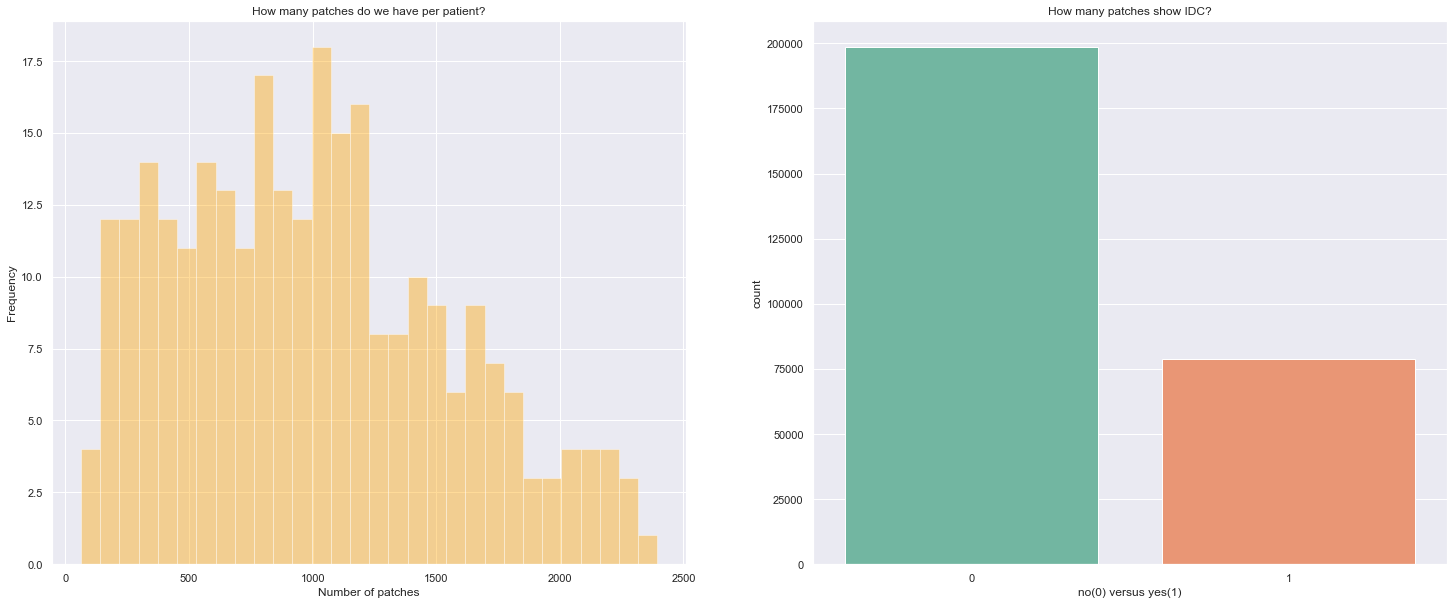

In [14]:
#source - https://www.kaggle.com/allunia/breastcancer
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,2,figsize=(25,10))
sns.distplot(data.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.countplot(data.target, palette="Set2", ax=ax[1]);
ax[1].set_xlabel("no(0) versus yes(1)")
ax[1].set_title("How many patches show IDC?");

## Visualising Breast Tissue

In [15]:
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

In [16]:
def get_cancer_dataframe(patient_id, cancer_id):
    path = base_path + "/" +patient_id + "/" + cancer_id
    files = listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [17]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

,x,y,target,path
0,2001,351,0,IDC_regular_ps50_idx5/10286/0/10286_idx5_x2001...
1,1201,951,0,IDC_regular_ps50_idx5/10286/0/10286_idx5_x1201...
2,1051,901,0,IDC_regular_ps50_idx5/10286/0/10286_idx5_x1051...
3,2001,451,0,IDC_regular_ps50_idx5/10286/0/10286_idx5_x2001...
4,1751,501,0,IDC_regular_ps50_idx5/10286/0/10286_idx5_x1751...


## Binary Cancer Visualisation

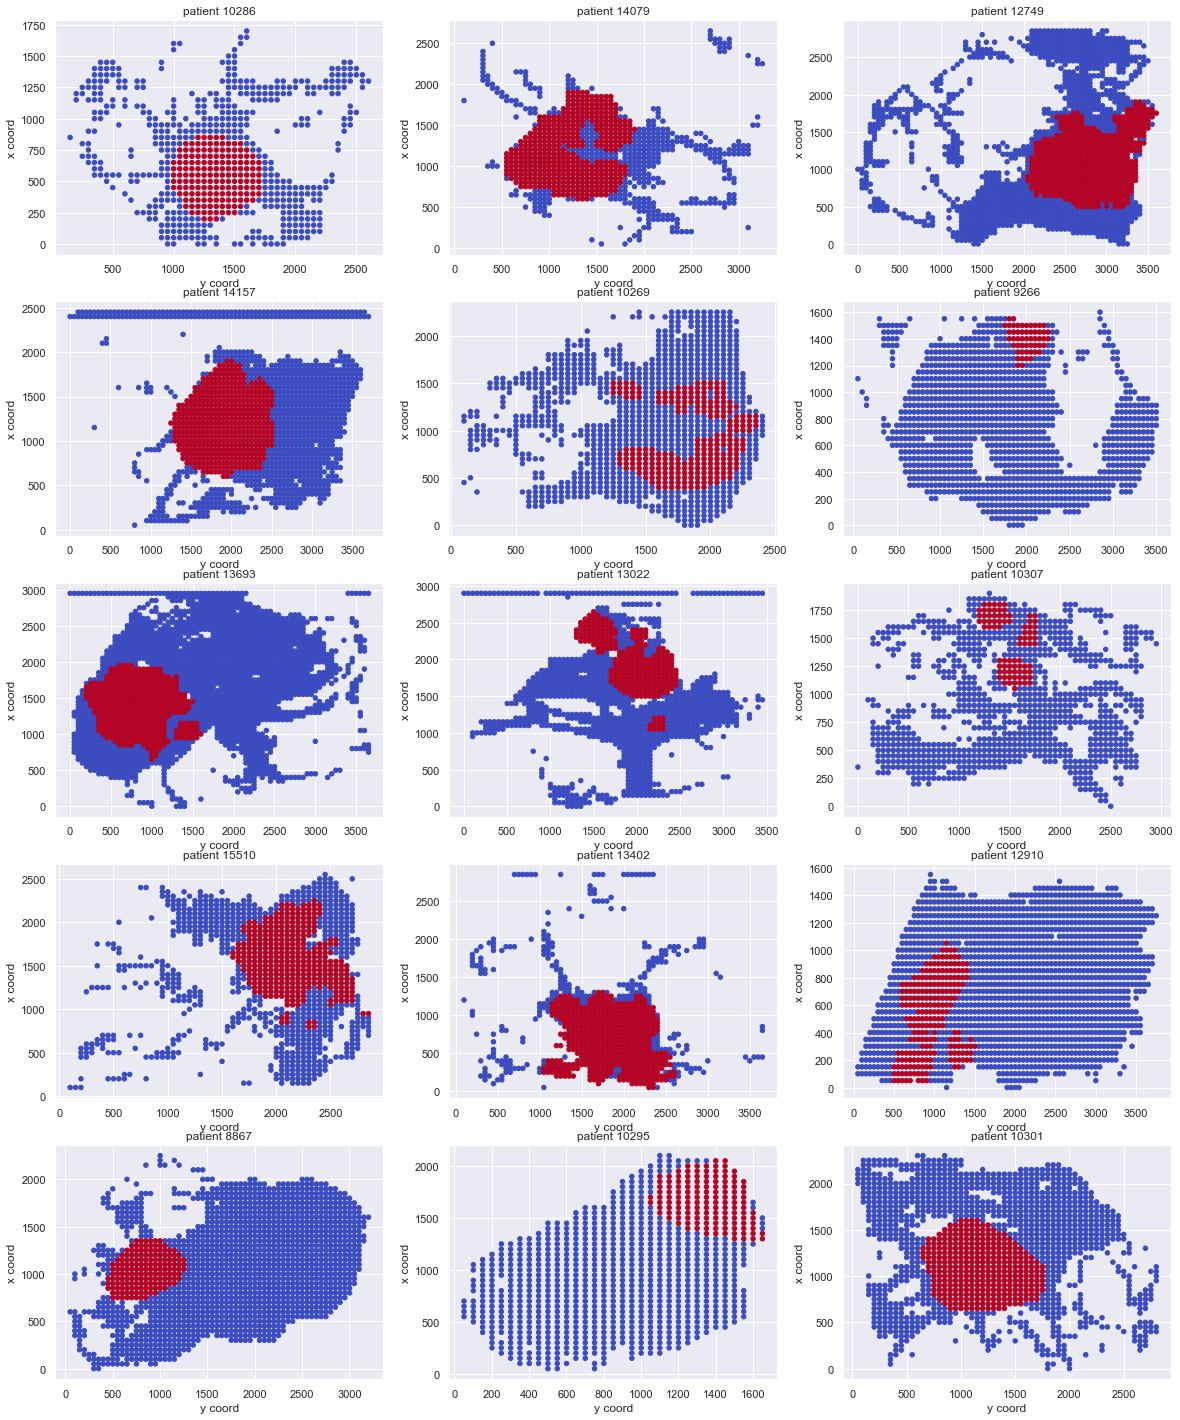

In [18]:
fig, ax = plt.subplots(5,3,figsize=(20, 25))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

## Visualising the whole breast tissue

In [20]:
def visualise_breast_tissue(patient_id, pred_df=None):
    example_df = get_patient_dataframe(patient_id)
    max_point = [example_df.y.max()-1, example_df.x.max()-1]
    grid = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    if pred_df is not None:
        pred_df = pred_df.loc[pred_df.patient_id==patient_id].copy()
        mask_proba = np.zeros(shape = (example_df.y.max(), example_df.x.max())).astype(np.uint8)
    
    broken_patches = []
    for n in range(len(example_df)):
        try:
            image = imread(example_df.path.values[n])
            
            target = example_df.target.values[n]
            
            x_coord = np.int(example_df.x.values[n])
            y_coord = np.int(example_df.y.values[n])
            x_start = x_coord - 1
            y_start = y_coord - 1
            x_end = x_start + 50
            y_end = y_start + 50

            grid[y_start:y_end, x_start:x_end] = image
            if target == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 150
                mask[y_start:y_end, x_start:x_end, 1] = 150
                mask[y_start:y_end, x_start:x_end, 2] = 250
            if pred_df is not None:
                proba = pred_df[
                    (pred_df.x.astype(np.int)==x_coord) & (pred_df.y.astype(np.int)==y_coord)
                ].proba.values
                print(proba)
                mask_proba[y_start, x_start] = np.float(proba)
                print(mask_proba[y_start, x_start])

        except ValueError:
            broken_patches.append(example_df.path.values[n])
    
    if pred_df is not None:
        return grid, mask, broken_patches, mask_proba
    else:
        return grid, mask, broken_patches

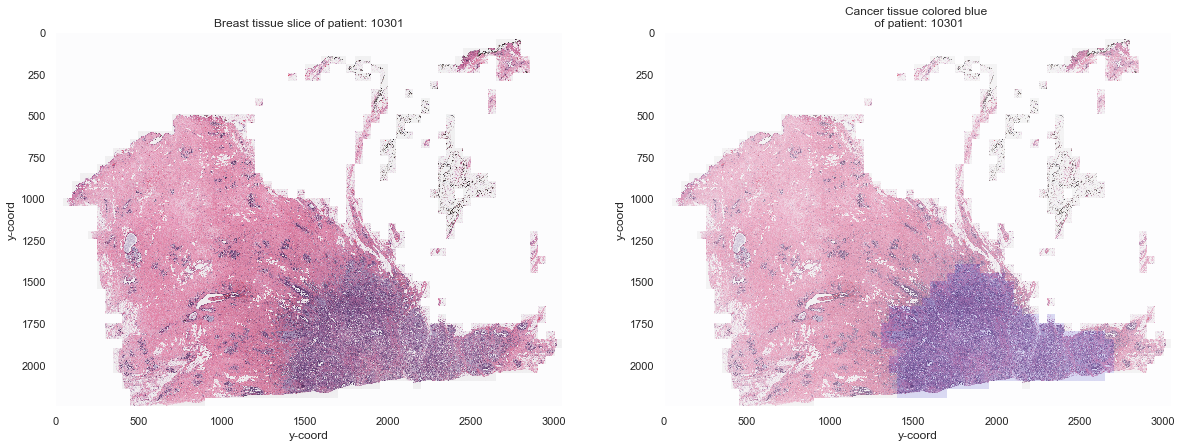

In [21]:
#source - https://www.kaggle.com/allunia/breastcancer
example = "15516"
grid, mask, broken_patches = visualise_breast_tissue(example)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(grid, alpha=0.9)
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.7)
ax[0].grid(False)
ax[1].grid(False)
for m in range(2):
    ax[m].set_xlabel("y-coord")
    ax[m].set_ylabel("y-coord")
ax[0].set_title("Breast tissue slice of patient: " + patient_id)
ax[1].set_title("Cancer tissue colored blue \n of patient: " + patient_id);

## Display random samples of train images

In [22]:
# source: https://www.kaggle.com/gpreda/honey-bee-subspecies-classification

def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

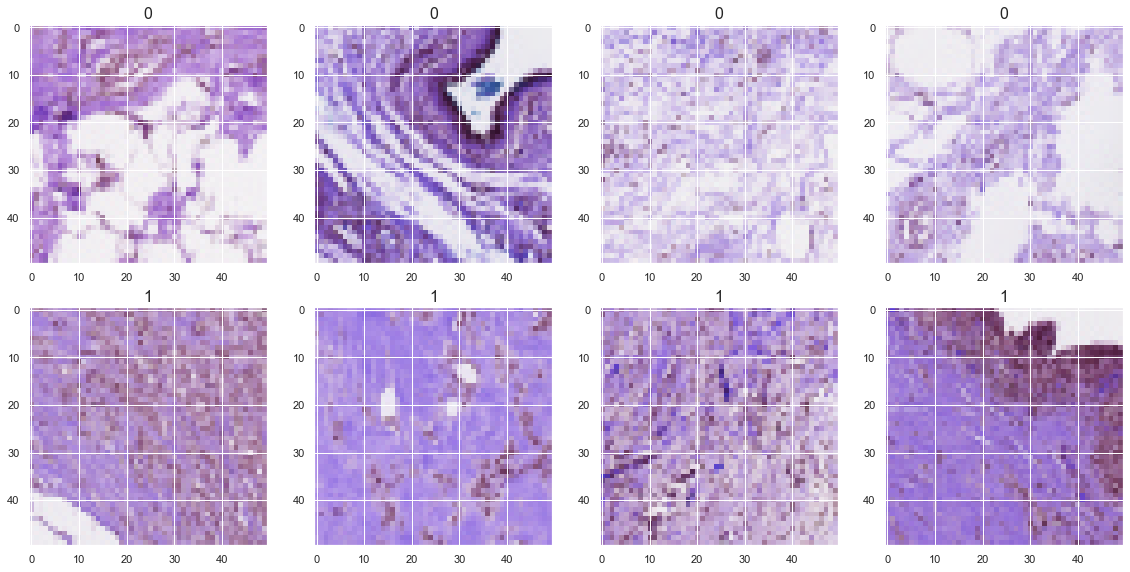

In [23]:
IMAGE_PATH = 'full_data/'

draw_category_images('target',4, data, IMAGE_PATH)

## Check the count for class
Need to check the count for class imbalance issue

In [24]:
# What is the class distribution?

data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

## Class Imbalance
Since there is a imbalance I will be taking the a dataset of 0's, and 1's with 78786 images each to solve the class imbalance problem

In [28]:
SAMPLE_SIZE = 78786
IMAGE_SIZE = 50

In [29]:
# take a sample of the majority class 0 
df_zero = data[data['target'] == '0'].sample(SAMPLE_SIZE, random_state=106)
# take a sample of class 1 (total = 78786)
df_one = data[data['target'] == '1'].sample(SAMPLE_SIZE, random_state=106)

# concat the two dataframes
data = pd.concat([df_zero, df_one], axis=0).reset_index(drop=True)

# Check the new class distribution
data['target'].value_counts()

1    78786
0    78786
Name: target, dtype: int64

## Creating Datasets
Here we will be creating Train, Validation and Test datasets

In [30]:
#Firstly we will split train and validation data
# stratify=y creates a balanced validation set.
y = data['target']

df_train, df_val_test = train_test_split(data, test_size=0.30, random_state=106, stratify=y)

print(df_train.shape)
print(df_val_test.shape)

(110300, 3)
(47272, 3)


In [31]:
#Now we will split df_val_test into validatio and test datasets
x = df_val_test['target']

df_val, df_test = train_test_split(df_val_test, test_size=0.50, random_state=106, stratify=x)

print(df_val.shape)
print(df_test.shape)

(23636, 3)
(23636, 3)


In [32]:
df_train['target'].value_counts()

1    55150
0    55150
Name: target, dtype: int64

In [33]:
df_val['target'].value_counts()

1    11818
0    11818
Name: target, dtype: int64

In [34]:
df_test['target'].value_counts()

1    11818
0    11818
Name: target, dtype: int64

In [35]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join(base_dir, 'test_dir')
os.mkdir(test_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

# create new folders inside test_dir
a_no_idc = os.path.join(test_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(test_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [36]:
# Checking for the folders that have been created
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [37]:
os.listdir('base_dir/val_dir')

['a_no_idc', 'b_has_idc']

In [38]:
os.listdir('base_dir/test_dir')

['a_no_idc', 'b_has_idc']

## Sending Images into respective folders

In [39]:
# Set the id as the index in df_data
data.set_index('image_id', inplace=True)

In [40]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(full_data, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
        
    
    

    # source path to image
    src = os.path.join(full_data, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    
    
# Transfer the test images

for image in test_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
        
    
    

    # source path to image
    src = os.path.join(full_data, fname)
    # destination path to image
    dst = os.path.join(test_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [41]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

55150
55150


In [42]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

11818
11818


In [43]:
# check how many test images we have in each folder

print(len(os.listdir('base_dir/test_dir/a_no_idc')))
print(len(os.listdir('base_dir/test_dir/b_has_idc')))

11818
11818


## IDC Model Building

### Image Augmentation
Here we will just apply image augmentation to just train and validation datasets

In [44]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = 'base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
num_test_samples = len(df_test)

train_batch_size = 10
val_batch_size = 10
test_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_test_samples / test_batch_size)

In [45]:
datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=15,zoom_range=[0.9, 1.25],brightness_range=[0.5, 1.5],height_shift_range=0.1)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 110300 images belonging to 2 classes.
Found 23636 images belonging to 2 classes.
Found 23636 images belonging to 2 classes.


In [43]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128
#fourth_filters = 256



dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, strides = 1, padding = "same", activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, strides = 1, padding = "same", activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, strides = 1, padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, strides = 1, padding = "same", activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, strides = 1, padding = "same", activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, strides = 1, padding = "same", activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, strides = 2, padding = "same", activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, strides = 2, padding = "same", activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, strides = 2, padding = "same", activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        3

## Training Model

In [44]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [60]:
filepath = "IDC_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=15, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/15
11029/11030 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8599
Epoch 00001: val_accuracy improved from -inf to 0.85480, saving model to IDC_model.h5
11030/11030 [==============================] - 1558s 141ms/step - loss: 0.3349 - accuracy: 0.8599 - val_loss: 0.3437 - val_accuracy: 0.8548
Epoch 2/15
11029/11030 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0.8615
Epoch 00002: val_accuracy did not improve from 0.85480
11030/11030 [==============================] - 1571s 142ms/step - loss: 0.3320 - accuracy: 0.8615 - val_loss: 0.3414 - val_accuracy: 0.8545
Epoch 3/15
11029/11030 [============================>.] - ETA: 0s - loss: 0.3290 - accuracy: 0.8624
Epoch 00003: val_accuracy improved from 0.85480 to 0.85822, saving model to IDC_model.h5
11030/11030 [==============================] - 1573s 143ms/step - loss: 0.3290 - accuracy: 0.8624 - val_loss: 0.3357 - val_accuracy: 0.8582
Epoch 4/15
11029/11030 [==========================

### Evaluating Model


In [45]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [46]:
model.load_weights('IDC_model.h5')

val_loss, val_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.3149147882695214
val_acc: 0.8708326


## Plotting Training Curves

In [47]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

NameError: name 'history' is not defined

## Making Prediction
We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.

In [48]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

23636/23636 [==============================] - 272s 12ms/step


In [49]:
predictions.shape

(23636, 2)

In [50]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [51]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.233617,0.766383
1,0.939483,0.060517
2,0.469583,0.530417
3,0.909092,0.090908
4,0.506723,0.493277


In [52]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

## AUC Score

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9399925102275353

## Confusion Matrix

In [79]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [55]:
# Get the labels of the test images.

test_labels = test_gen.classes

In [56]:
test_labels.shape

(23636,)

In [57]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [58]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[10118  1700]
 [ 1366 10452]]


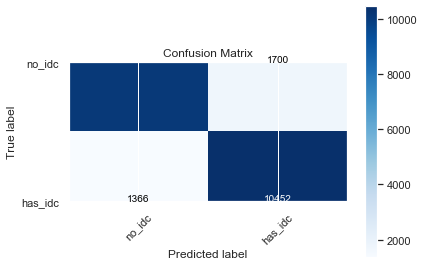

In [59]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Report

In [60]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.88      0.86      0.87     11818
     has_idc       0.86      0.88      0.87     11818

    accuracy                           0.87     23636
   macro avg       0.87      0.87      0.87     23636
weighted avg       0.87      0.87      0.87     23636



Recall = Given a class, will the classifier be able to detect it?

Precision = Given a class prediction from a classifier, how likely is it to be correct?

F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

## Training Model with pre-train weights (Transfer Learning)
Preparing data in accordance for InceptionV3

## As the total images are too many for my system to train on Inception v3. I will be creating a smaller dataset to ease it on the system

In [46]:
#copying all the data in dataframe "data" into v3_data for the transfer learning
v3_data = data

In [47]:
# take a sample of the majority class 0 
v3_df_zero = data[data['target'] == '0'].sample(3000, random_state=106)
# take a sample of class 1 (total = 78786)
v3_df_one = data[data['target'] == '1'].sample(3000, random_state=106)

# concat the two dataframes
v3_data = pd.concat([v3_df_zero, v3_df_one], axis=0).reset_index(drop=False)
# Check the new class distribution
v3_data['target'].value_counts()

1    3000
0    3000
Name: target, dtype: int64

## Creating Datasets
Train, Validation and Test datasets for InterceptV3

In [48]:
#Firstly we will split train and validation data
# stratify=y creates a balanced validation set.
w = v3_data['target']

v3_df_train, v3_df_val_test = train_test_split(v3_data, test_size=0.30, random_state=106, stratify=w)

print(v3_df_train.shape)
print(v3_df_val_test.shape)

(4200, 3)
(1800, 3)


In [49]:
#Now we will split df_val_test into validatio and test datasets
p = v3_df_val_test['target']

v3_df_val, v3_df_test = train_test_split(v3_df_val_test, test_size=0.50, random_state=106, stratify=p)

print(v3_df_val.shape)
print(v3_df_test.shape)

(900, 3)
(900, 3)


In [50]:
v3_df_train['target'].value_counts()

1    2100
0    2100
Name: target, dtype: int64

In [51]:
v3_df_val['target'].value_counts()

1    450
0    450
Name: target, dtype: int64

In [52]:
v3_df_test['target'].value_counts()

1    450
0    450
Name: target, dtype: int64

In [53]:
# Create a new directory
v3_base_dir = 'v3_base_dir'
os.mkdir(v3_base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 2 folders inside 'base_dir':

# train_dir
    # a_no_idc
    # b_has_idc

# val_dir
    # a_no_idc
    # b_has_idc



# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
v3_train_dir = os.path.join(v3_base_dir, 'v3_train_dir')
os.mkdir(v3_train_dir)

# val_dir
v3_val_dir = os.path.join(v3_base_dir, 'v3_val_dir')
os.mkdir(v3_val_dir)

# test_dir
v3_test_dir = os.path.join(v3_base_dir, 'v3_test_dir')
os.mkdir(v3_test_dir)


# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
a_no_idc = os.path.join(v3_train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(v3_train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(v3_val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(v3_val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

# create new folders inside test_dir
a_no_idc = os.path.join(v3_test_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(v3_test_dir, 'b_has_idc')
os.mkdir(b_has_idc)

## Sending Images into respective folders

In [54]:
# Set the id as the index in df_data
v3_data.set_index('image_id', inplace=True)

In [55]:
# Get a list of train and val images
v3_train_list = list(v3_df_train['image_id'])
v3_val_list = list(v3_df_val['image_id'])
v3_test_list = list(v3_df_test['image_id'])



# Transfer the train images


for image in v3_train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = v3_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(v3_learning_data, fname)
    # destination path to image
    dst = os.path.join(v3_train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    

# Transfer the val images

for image in v3_val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = v3_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
        
    
    

    # source path to image
    src = os.path.join(v3_learning_data, fname)
    # destination path to image
    dst = os.path.join(v3_val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)
    
    
# Transfer the test images

for image in v3_test_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = v3_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
        
    
    

    # source path to image
    src = os.path.join(v3_learning_data, fname)
    # destination path to image
    dst = os.path.join(v3_test_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [56]:
# check how many train images we have in each folder

print(len(os.listdir('v3_base_dir/v3_train_dir/a_no_idc')))
print(len(os.listdir('v3_base_dir/v3_train_dir/b_has_idc')))

2100
2100


In [57]:
print(len(os.listdir('v3_base_dir/v3_val_dir/a_no_idc')))
print(len(os.listdir('v3_base_dir/v3_val_dir/b_has_idc')))

450
450


In [58]:
print(len(os.listdir('v3_base_dir/v3_test_dir/a_no_idc')))
print(len(os.listdir('v3_base_dir/v3_test_dir/b_has_idc')))

450
450


#### All the datasets have the same number of class o's and 1's

In [59]:
v3_train_path = 'v3_base_dir/v3_train_dir'
v3_valid_path = 'v3_base_dir/v3_val_dir'
v3_test_path = 'v3_base_dir/v3_test_dir'

v3_num_train_samples = len(v3_df_train)
v3_num_val_samples = len(v3_df_val)
v3_num_test_samples = len(v3_df_test)

train_batch_size = 10
val_batch_size = 10
test_batch_size = 10


v3_train_steps = np.ceil(v3_num_train_samples / train_batch_size)
v3_val_steps = np.ceil(v3_num_val_samples / val_batch_size)
v3_test_steps = np.ceil(v3_num_test_samples / test_batch_size)

In [60]:
#Data Preparation
train_gen_v3 = datagen.flow_from_directory(v3_train_path,
                                        target_size=(299,299),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen_v3 = datagen.flow_from_directory(v3_valid_path,
                                        target_size=(299,299),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen_v3 = datagen.flow_from_directory(v3_test_path,
                                        target_size=(299,299),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 4200 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [61]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten
from keras.models import Sequential, Model, load_model

def inception_tl(nb_classes, freez_wts):
    
    trained_model = InceptionV3(include_top=False,weights='imagenet')
    x = trained_model.output
    x = GlobalAveragePooling2D()(x)
    pred_inception= Dense(nb_classes,activation='softmax')(x)
    model = Model(inputs=trained_model.input,outputs=pred_inception)
    
    for layer in trained_model.layers:
        layer.trainable=(1-freez_wts)
    
    return(model)

Using TensorFlow backend.


In [62]:
modelv3 = inception_tl(nb_classes=2, freez_wts=False)
modelv3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')



In [63]:
v3_filepath = "v3_IDC_model.h5"
v3_checkpoint = ModelCheckpoint(v3_filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
v3_reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.001)
callbacks_list = [v3_checkpoint, v3_reduce_lr]



hist1v3 = modelv3.fit_generator(train_gen_v3, steps_per_epoch=v3_train_steps,
                           validation_data=val_gen_v3,validation_steps=v3_val_steps,
                           epochs=10).history

Epoch 1/10
420/420 [==============================] - 1481s 4s/step - loss: 0.5847 - accuracy: 0.7200 - val_loss: 166.2631 - val_accuracy: 0.7156
Epoch 2/10
420/420 [==============================] - 1412s 3s/step - loss: 0.5784 - accuracy: 0.7136 - val_loss: 13.4520 - val_accuracy: 0.6033
Epoch 3/10
420/420 [==============================] - 1415s 3s/step - loss: 0.5602 - accuracy: 0.7260 - val_loss: 0.3057 - val_accuracy: 0.7844
Epoch 4/10
420/420 [==============================] - 1425s 3s/step - loss: 0.5145 - accuracy: 0.7617 - val_loss: 0.5690 - val_accuracy: 0.7911
Epoch 5/10
420/420 [==============================] - 1444s 3s/step - loss: 0.4979 - accuracy: 0.7700 - val_loss: 0.5068 - val_accuracy: 0.7944
Epoch 6/10
420/420 [==============================] - 1436s 3s/step - loss: 0.4888 - accuracy: 0.7788 - val_loss: 0.6323 - val_accuracy: 0.7622
Epoch 7/10
420/420 [==============================] - 1426s 3s/step - loss: 0.4915 - accuracy: 0.7724 - val_loss: 0.6614 - val_accura

## Saving Model

In [65]:
modelv3.save('IDC_Modelv3.h5')

## Evaluate Model using Val set

In [64]:
# get the metric names so we can use evaulate_generator
modelv3.metrics_names

['loss', 'accuracy']

In [67]:
modelv3.load_weights('IDC_Modelv3.h5')

val_loss, val_acc = \
modelv3.evaluate_generator(test_gen_v3, 
                        steps=len(v3_df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.43851083517074585
val_acc: 0.6644444465637207


## V3 Predictions

In [68]:
# make a prediction
v3_predictions = modelv3.predict_generator(test_gen_v3, steps=len(v3_df_val), verbose=1)

900/900 [==============================] - 112s 124ms/step


In [69]:
v3_predictions.shape

(900, 2)

In [70]:
# This is how to check what index keras has internally assigned to each class. 
test_gen_v3.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [71]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

v3_df_preds = pd.DataFrame(v3_predictions, columns=['no_idc', 'has_idc'])

v3_df_preds.head()

,no_idc,has_idc
0,0.794927,0.205073
1,0.785911,0.214089
2,0.888760,0.111240
3,0.313074,0.686926
4,0.660780,0.339220


In [72]:
# Get the true labels
v3_y_true = test_gen_v3.classes

# Get the predicted labels as probabilities
v3_y_pred = v3_df_preds['has_idc']

## Auc Score

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(v3_y_true, v3_y_pred)

0.8021432098765432

## Confusion Matrix

In [75]:
# Get the labels of the test images.

v3_test_labels = test_gen_v3.classes

In [76]:
v3_test_labels.shape

(900,)

In [77]:
# argmax returns the index of the max value in a row
v3_cm = confusion_matrix(v3_test_labels, v3_predictions.argmax(axis=1))

Confusion matrix, without normalization
[[419  31]
 [256 194]]


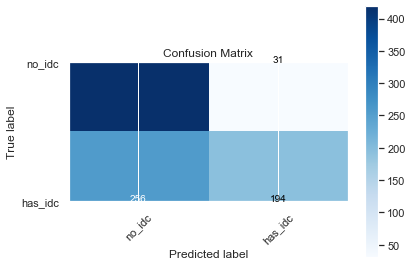

In [80]:
# Define the labels of the class indices. These need to match the 
# order shown above.
v3_cm_plot_labels = ['no_idc', 'has_idc']

plot_confusion_matrix(v3_cm, v3_cm_plot_labels, title='Confusion Matrix')

## Report

In [81]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
v3_y_pred_binary = v3_predictions.argmax(axis=1)

v3_report = classification_report(v3_y_true, v3_y_pred_binary, target_names=v3_cm_plot_labels)

print(v3_report)

              precision    recall  f1-score   support

      no_idc       0.62      0.93      0.74       450
     has_idc       0.86      0.43      0.57       450

    accuracy                           0.68       900
   macro avg       0.74      0.68      0.66       900
weighted avg       0.74      0.68      0.66       900

